## **CLASSIFICATION MODEL ON VACCINES**

**By Lorna Gatimu**


 ## **Introduction**

 # 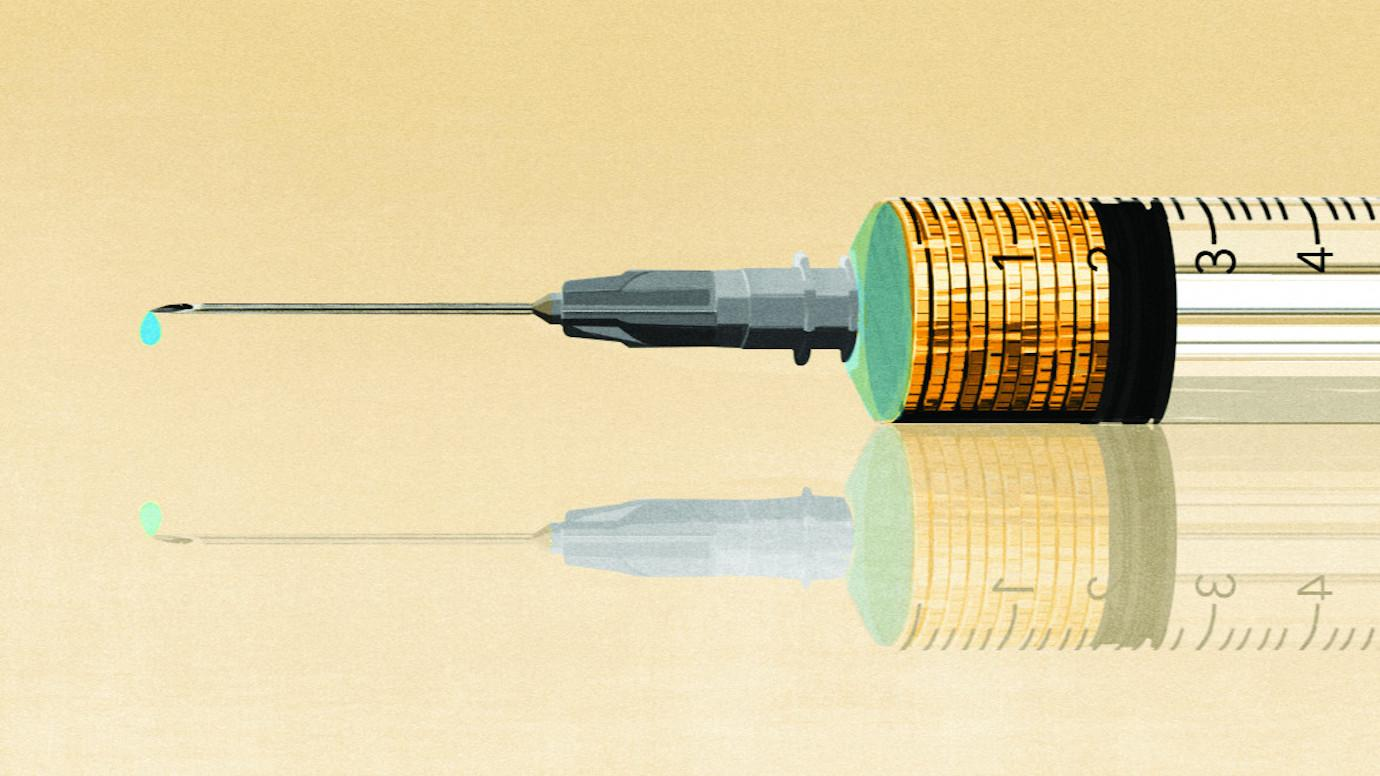

# **Business Understanding**

# Problem Statement
Vaccination plays a huge role in public health especially when it comes to dealing with infectious diseases.Vaccines are very important as they provide immunity against some diseases.
There is however limited information on how various factors affect the acceptance and uptake of a particular vaccine.We will evaluate these factors based on the avilable data.
Gaining a deeper understanding of these influencing factors is crucial for policymakers to design targeted interventions and communication strategies to enhance vaccination coverage. Such insights are also valuable to vaccine manufacturers, enabling them to estimate demand more accurately and optimize production during outbreaks or pandemics.

# Objectives
1. To determine how socioeconomic factors influence an individual's uptake of the seasonal flu vaccines.

2. To determine how behavioral factors influence an individual's uptake of the seasonal flu vaccines.

3. To determine how demographic background factors influence an individual's uptake of the seasonal flu vaccines.

4. To understand how an individual's  knowledge, perception, and attitude towards seasonal flu vaccines influence the uptake of the vaccines.








# **Data Understanding**
Source Data files were obtained from: [DRIVENDATA](https://www.kaggle.com/datasets/soundslikedata/flu-shot-learning)(Source: CDC, NCRID and NCHS (2012), National 2009 H1N1 Flu Survey). This data was colleted over the phone between late 2009 and June 2010

The data labels are described in this [link.](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels)


In [42]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


In [43]:
#loading the datasets
submission_format = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\submission_format.csv')
test_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\test_set_features.csv')
training_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_features.csv')
training_set_labels = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_labels.csv')

# first few rows of each dataset
print('SUBMISSION FORMAT DATASET')
print(submission_format.info())

print('\nTEST SET FEATURES DATASET')
print(test_set_features.info())

print('\nTRAINING SET FEATURES DATASET')
print(training_set_features.info())

print('\nTRAINING SET LABELS DATASET')
print(training_set_labels.info())


SUBMISSION FORMAT DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB
None

TEST SET FEATURES DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask       

In [44]:
print(submission_format.shape)
print(test_set_features.shape)
print(training_set_features.shape)
print(training_set_labels.shape)

(26708, 3)
(26708, 36)
(26707, 36)
(26707, 3)


### ***Dropping what will not be needed for the classification models***

My target feature is the seasonal vaccine and therefore some of the columns will not be necessary

In [45]:
print(training_set_features.columns)
print(training_set_labels.columns)
print(test_set_features.columns)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')
Index(['respondent_id', 'h1n1_concern', 'h

In [46]:

# List of columns related to H1N1 vaccine
h1n1_columns = [
    "h1n1_concern", "h1n1_knowledge", "doctor_recc_h1n1",
    "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc"
]

# Drop H1N1 vaccine-related columns from the training set and test set feature data
# Use errors='ignore' to avoid KeyError if any columns are not found
training_set_features.drop(columns=h1n1_columns, axis=1, inplace=True, errors='ignore')
test_set_features.drop(columns=h1n1_columns, axis=1, inplace=True, errors='ignore')

# Optionally, drop the 'h1n1_vaccine' column from the labels dataset (if needed)
training_set_labels.drop(columns=["h1n1_vaccine"], axis=1, inplace=True, errors='ignore')

# Print to verify the changes
print("Training set features after dropping H1N1 columns:")
print(training_set_features.head())

print("Test set features after dropping H1N1 columns:")
print(test_set_features.head())
print(training_set_labels.head())


Training set features after dropping H1N1 columns:
   respondent_id  behavioral_antiviral_meds  behavioral_avoidance  \
0              0                        0.0                   0.0   
1              1                        0.0                   1.0   
2              2                        0.0                   1.0   
3              3                        0.0                   1.0   
4              4                        0.0                   1.0   

   behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  \
0                   0.0                    0.0                          0.0   
1                   0.0                    1.0                          0.0   
2                   0.0                    0.0                          0.0   
3                   0.0                    1.0                          1.0   
4                   0.0                    1.0                          1.0   

   behavioral_outside_home  behavioral_touch_face  doctor_r

### ***Checking for duplicates***


In [47]:
# Check duplicates
duplicates_train = training_set_features.duplicated()
duplicates_test = test_set_features.duplicated()
num_duplicates_train = duplicates_train.sum()
num_duplicates_test = duplicates_test.sum()

print("Duplicate Rows in Train Set:", num_duplicates_train)
print("Duplicate Rows in Test Set:", num_duplicates_test)

Duplicate Rows in Train Set: 0
Duplicate Rows in Test Set: 0


### ***Checking for Missing Values***

In [48]:
missing=(training_set_features.isnull().sum()/len(training_set_features))*100 #pecentage of missing values
missing


respondent_id                   0.000000
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex                             0.000000
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own                     7.645936
employment_status               5.477965
hhs_geo_region  

*The columns employment_occupation, employment_industry, and health_insurance have the highest percentage of missing values, with 50.4%, 49.9%, and 46.0% of entries missing, respectively.

*A significant portion (10,231) of the missing values in employment_occupation and employment_industry comes from respondents who selected "Not in Labor Force" for employment_status, suggesting these are "not applicable" rather than missing.

*Similarly, 1,453 missing values in these columns can be attributed to unemployed respondents, indicating "not applicable" responses.

*Missing values for vaccine recommendations from doctors tend to occur together, where if one is missing, the other is likely missing as well.

*Respondents who left certain questions unanswered, such as those regarding chronic medical conditions, children under 6 months, health worker status, opinions, income, and personal life, often left other related questions blank as well.

*The patterns in missing data may reveal unique respondent groups. Treating missing values as a separate category could provide valuable insights. Proper handling of these missing data is crucial for effective preprocessing and analysis.

### ***Working on the columns***

In [49]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
training_set_features.loc[training_set_features["employment_status"] == "Unemployed", "employment_industry"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
training_set_features.loc[training_set_features["employment_status"] == "Not in Labor Force", "employment_industry"] = "not employed"

In [50]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
training_set_features.loc[training_set_features["employment_status"] == "Unemployed", "employment_occupation"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
training_set_features.loc[training_set_features["employment_status"] == "Not in Labor Force", "employment_occupation"] = "not employed"

In [51]:
#Filling the missing values in health insurance with 0 assumptions is that there is correlation between the poverty index and health cover
training_set_features["health_insurance"].fillna(0, inplace=True)

In [52]:
# check again for the missing values
missing=(training_set_features.isnull().sum()/len(training_set_features))*100
missing

respondent_id                   0.000000
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance                0.000000
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex                             0.000000
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own                     7.645936
employment_status               5.477965
hhs_geo_region  

In [53]:
# filling with unkwown for categorical isna values

# education
training_set_features["education"].fillna("Unknown", inplace=True)

# marital status
training_set_features["marital_status"].fillna("Unknown", inplace=True)

# rent
training_set_features["rent_or_own"].fillna("Unknown", inplace=True)

# income/poverty
training_set_features["income_poverty"].fillna("Unknown", inplace=True)

In [54]:
# fill all the categorical variable with the modal class
train_filled = training_set_features.fillna(training_set_features.mode().iloc[0])
missing2=train_filled.isnull().sum() # confirm if the data has been filled.

missing2

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
dtype: int

In [55]:
# Merge the Training Features dataset with the Training Labels dataset on 'respondent_id'
train_merged = pd.merge(training_set_features, training_set_labels, on='respondent_id', how='inner')
train_merged . set_index("respondent_id",inplace=True)
train_merged.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [56]:
# Save the merged dataset to a CSV file 
train_merged.to_csv('H1N1_and_Seasonal_Flu_Vaccine.csv', index=False)
df = pd.read_csv('H1N1_and_Seasonal_Flu_Vaccine.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             26707 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

# **Exploratory Data Analysis**

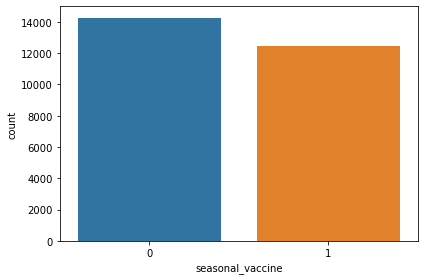

In [57]:
#visualizing the outcomes
sns.countplot(x='seasonal_vaccine',data=training_set_labels)

plt.tight_layout()
plt.show()
                



- The number of respondents who had taken the seasonal flu vaccine is lower compared to those who had not taken it.

**Class balance**:

The counts of the two classes are not significantly different and are relatively close, we can consider dataset to be reasonably balanced.

### ***Univariate Analysis***

#### ***Factors affecting vaccine getting***

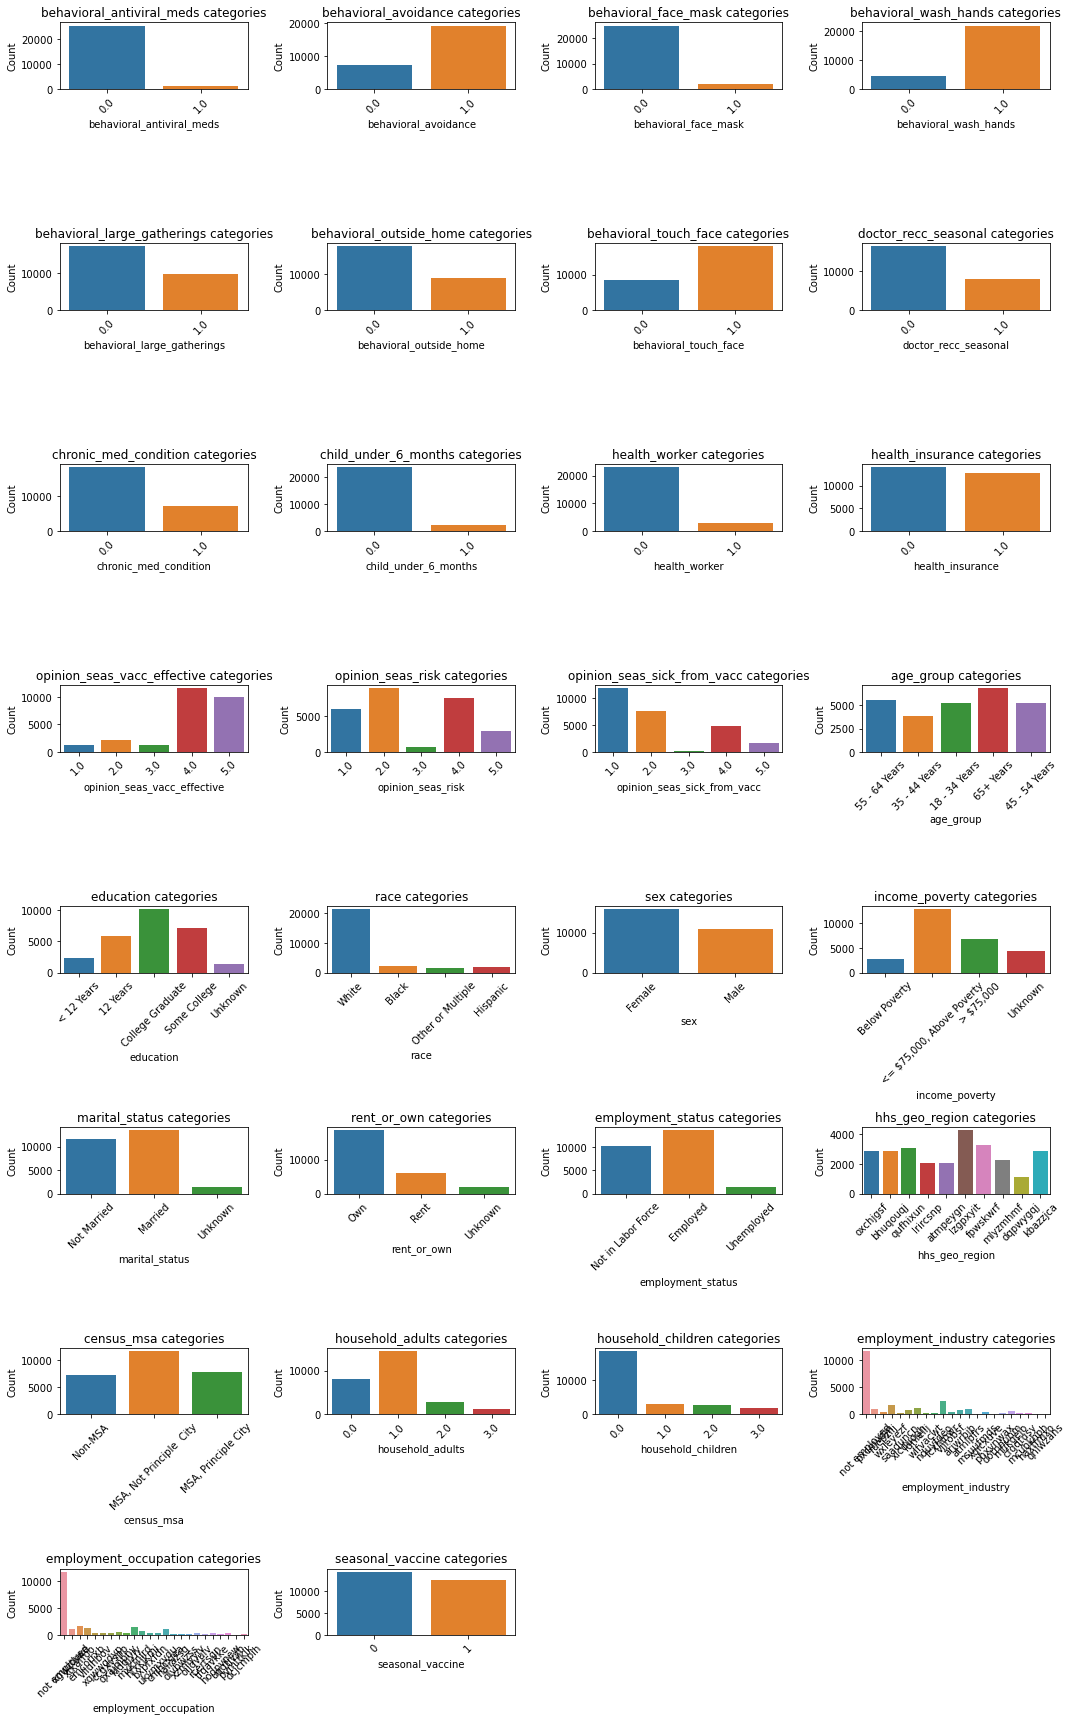

In [58]:
# Plot Categories
columns = df.columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f"{column} categories")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


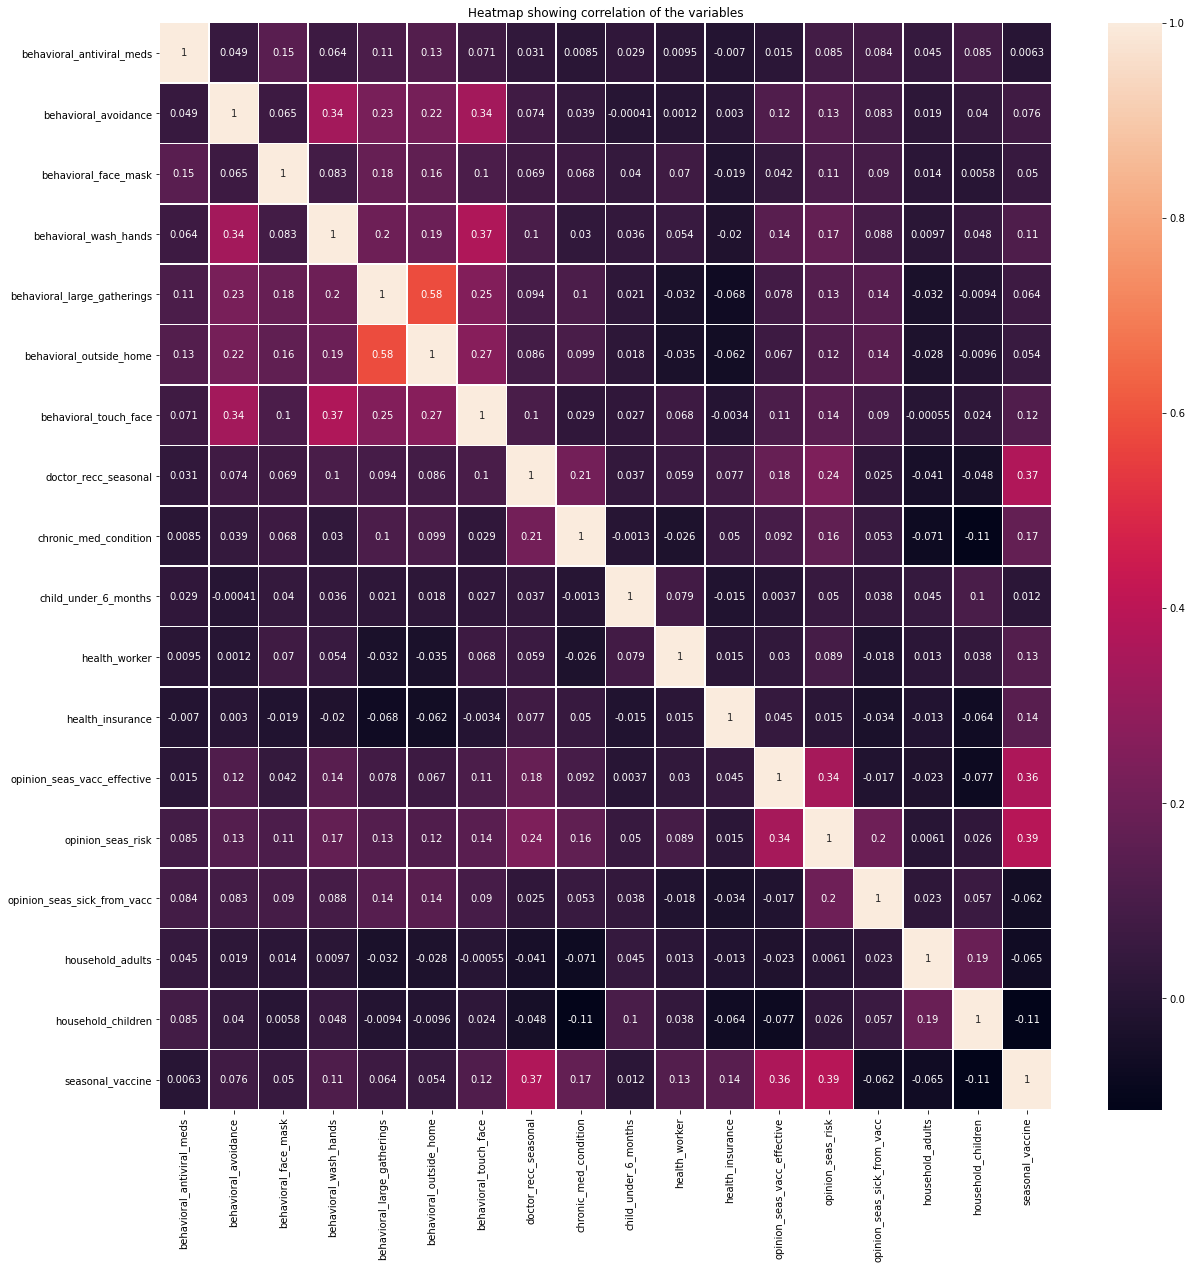

In [59]:
corr =df.corr(method ='pearson') #checking for multicollinearity

plt.figure(figsize = (20,20))
sns.heatmap(corr,linewidth=0.5,annot=True)
plt.title('Heatmap showing correlation of the variables')
plt.show()


# **Feature Engineering**

### ***Data Encoding***

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26636 non-null  float64
 1   behavioral_avoidance         26499 non-null  float64
 2   behavioral_face_mask         26688 non-null  float64
 3   behavioral_wash_hands        26665 non-null  float64
 4   behavioral_large_gatherings  26620 non-null  float64
 5   behavioral_outside_home      26625 non-null  float64
 6   behavioral_touch_face        26579 non-null  float64
 7   doctor_recc_seasonal         24547 non-null  float64
 8   chronic_med_condition        25736 non-null  float64
 9   child_under_6_months         25887 non-null  float64
 10  health_worker                25903 non-null  float64
 11  health_insurance             26707 non-null  float64
 12  opinion_seas_vacc_effective  26245 non-null  float64
 13  opinion_seas_ris

### ***One Hot Encoding***

In [61]:

# Selecting the columns for encoding
encoded_df = df[["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                 "census_msa", "income_poverty"]]

# Using one-hot encoding to create dummy columns (for older scikit-learn versions)
ohe = OneHotEncoder(sparse=False)  # Use sparse=False for dense output
data_enc1 = ohe.fit_transform(encoded_df)

# Manually generating feature names
feature_names = []
for col, categories in zip(encoded_df.columns, ohe.categories_):
    feature_names.extend([f"{col}_{category}" for category in categories])

# Converting the encoded data into a DataFrame
data_encoded = pd.DataFrame(data_enc1, columns=feature_names)

# Displaying the first few rows
data_encoded.head()


,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,...,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_nan,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
df_copy =df.copy()

In [65]:
columns_to_drop = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                   "census_msa", "income_poverty", "hhs_geo_region", "employment_industry", "employment_occupation"]
df_copy.drop(columns_to_drop, axis=1, inplace=True)
df_copy.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,0.0,0


In [67]:
df2 = pd.merge(df_copy,data_encoded,left_index=True, right_index=True)

# **Modelling**

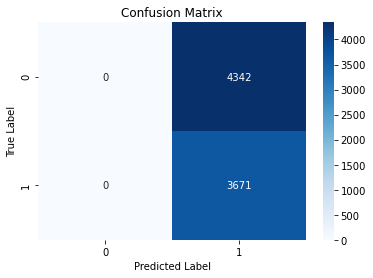

In [70]:
## BASELINE MODEL
# split data into train and test, claze size=0.3
X = df2.drop(columns=["seasonal_vaccine"], axis=1)
y = df2["seasonal_vaccine"]

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the dummy classifier
dummy_classifier = DummyClassifier(strategy="constant", constant=1)
dummy_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dummy_classifier.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()

In [71]:
# Evaluation of the baseline model

#Accuracy=TP+TN/TP+TN+FP+FN
TP=3671
TN=0
FP=4342
FN=0
baseline_accuracy=(TP+TN)/(TP+FP+TN+FN)
print("Baseline Accuracy: " ,baseline_accuracy)

#precision TP/TP+FP
baseline_precision=(TP/(TP+FP))
print("Baseline Precision: " ,baseline_precision)

baseline_recall=(TP/(TP+FN))
print("Baseline Recall: " ,baseline_recall)

baseline_F1score=(2*baseline_precision* baseline_recall)/(baseline_precision+baseline_recall)
print("Baseline F1score: " ,baseline_F1score)

Baseline Accuracy:  0.4581305378759516
Baseline Precision:  0.4581305378759516
Baseline Recall:  1.0
Baseline F1score:  0.6283806915439919


**Baseline Model Observations**
1. **Baseline Accuracy** is approximately 45.81%, it means that the dummy classifier, correctly predicts around 45.81% of instances in the test data.

2. **Baseline Precision** is  also 45.81%. It is equal to the accuracy since the dummy classifier always predicts the positive class.

3. **Baseline Recall** is 100%. Since the dummy classifier always predicts the positive class, it correctly identifies all the actual positive instances.

4. **Baseline F1-score** is approximately 62.84%. A higher F1-score would indicate a better balance between precision and recall.

These metrics will be used to reference the performance of subsequent models, hoping that they will outperform the baseline model.

In [72]:
# fit the model in logistic regression

# Instantiate the model
model1 = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model1.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred1 = model1.predict(X_train_scaled)

# Create confusion matrix
cm = confusion_matrix(y_train, y_train_pred1)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

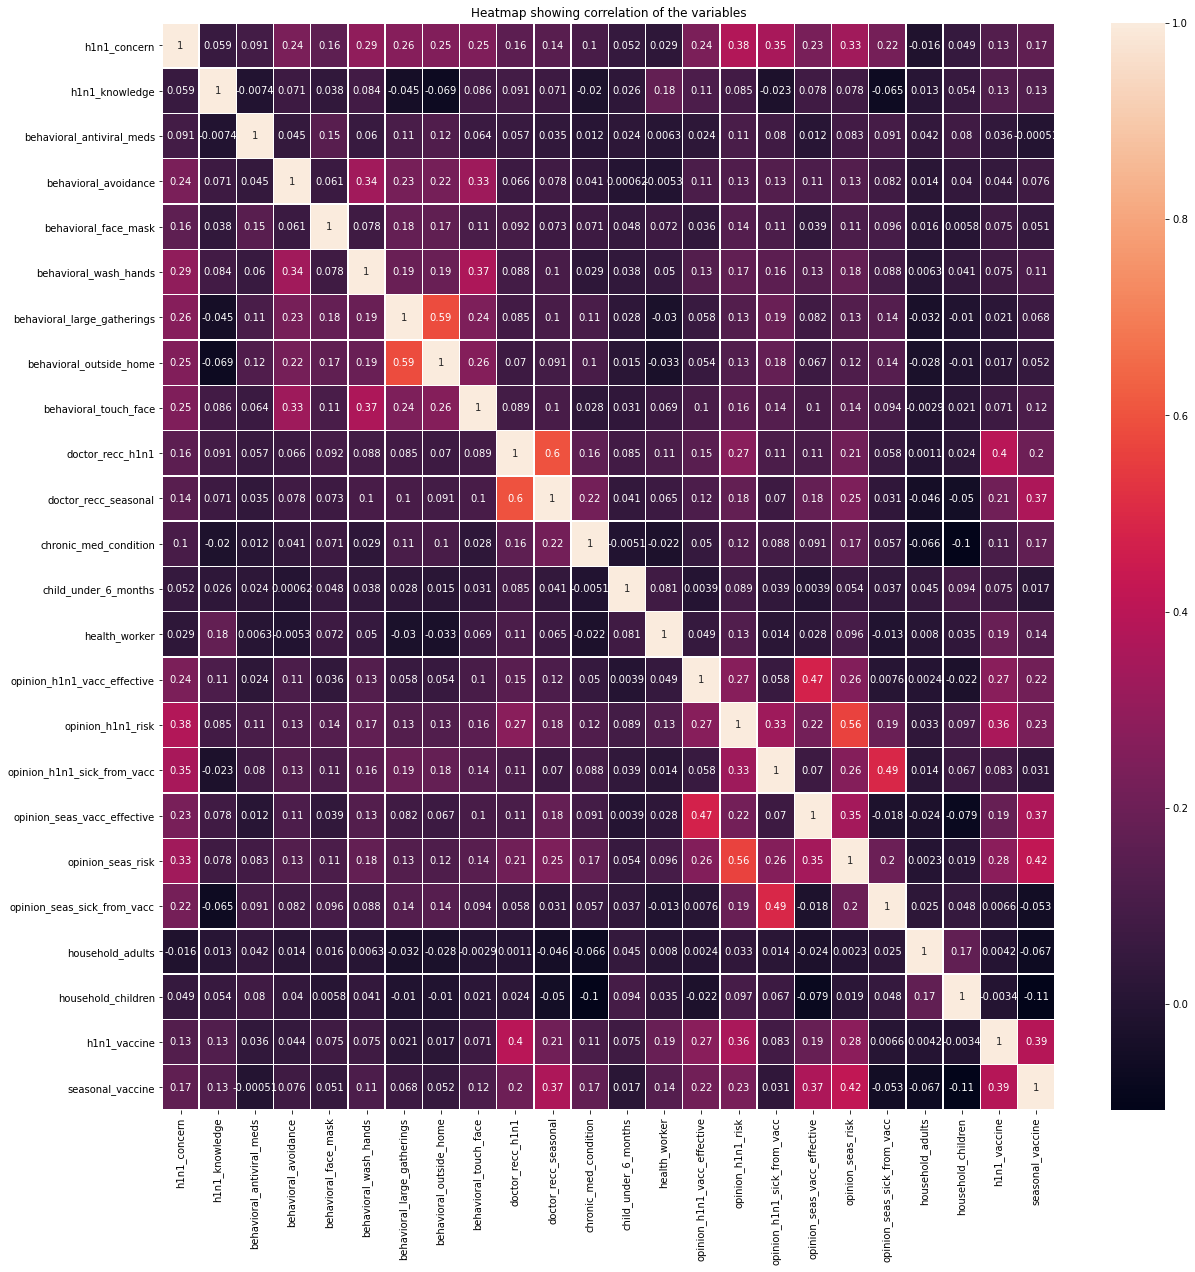

In [ ]:
corr =df.corr(method ='pearson') #checking for multicollinearity

plt.figure(figsize = (20,20))
sns.heatmap(corr,linewidth=0.5,annot=True)
plt.title('Heatmap showing correlation of the variables')
plt.show()


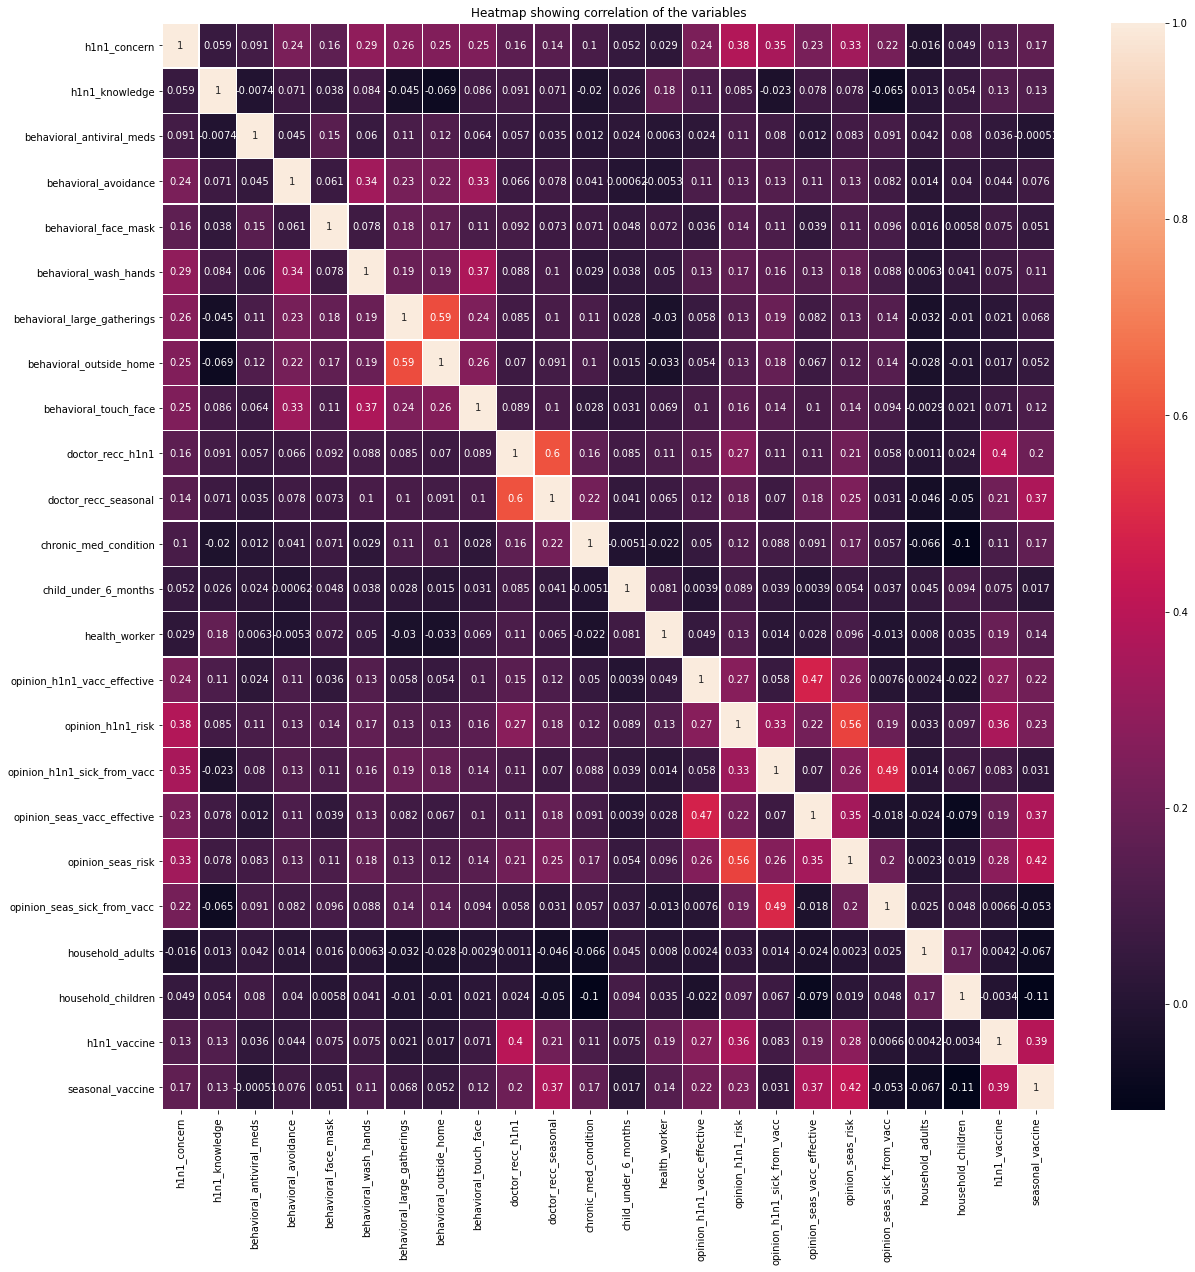

In [ ]:
corr =df.corr(method ='pearson') #checking for multicollinearity

plt.figure(figsize = (20,20))
sns.heatmap(corr,linewidth=0.5,annot=True)
plt.title('Heatmap showing correlation of the variables')
plt.show()


# **Splitting of the data**

,seasonal_vaccine,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_face_mask_1.0,behavioral_wash_hands_1.0,behavioral_large_gatherings_1.0,behavioral_outside_home_1.0,behavioral_touch_face_1.0,doctor_recc_seasonal_1.0,chronic_med_condition_1.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


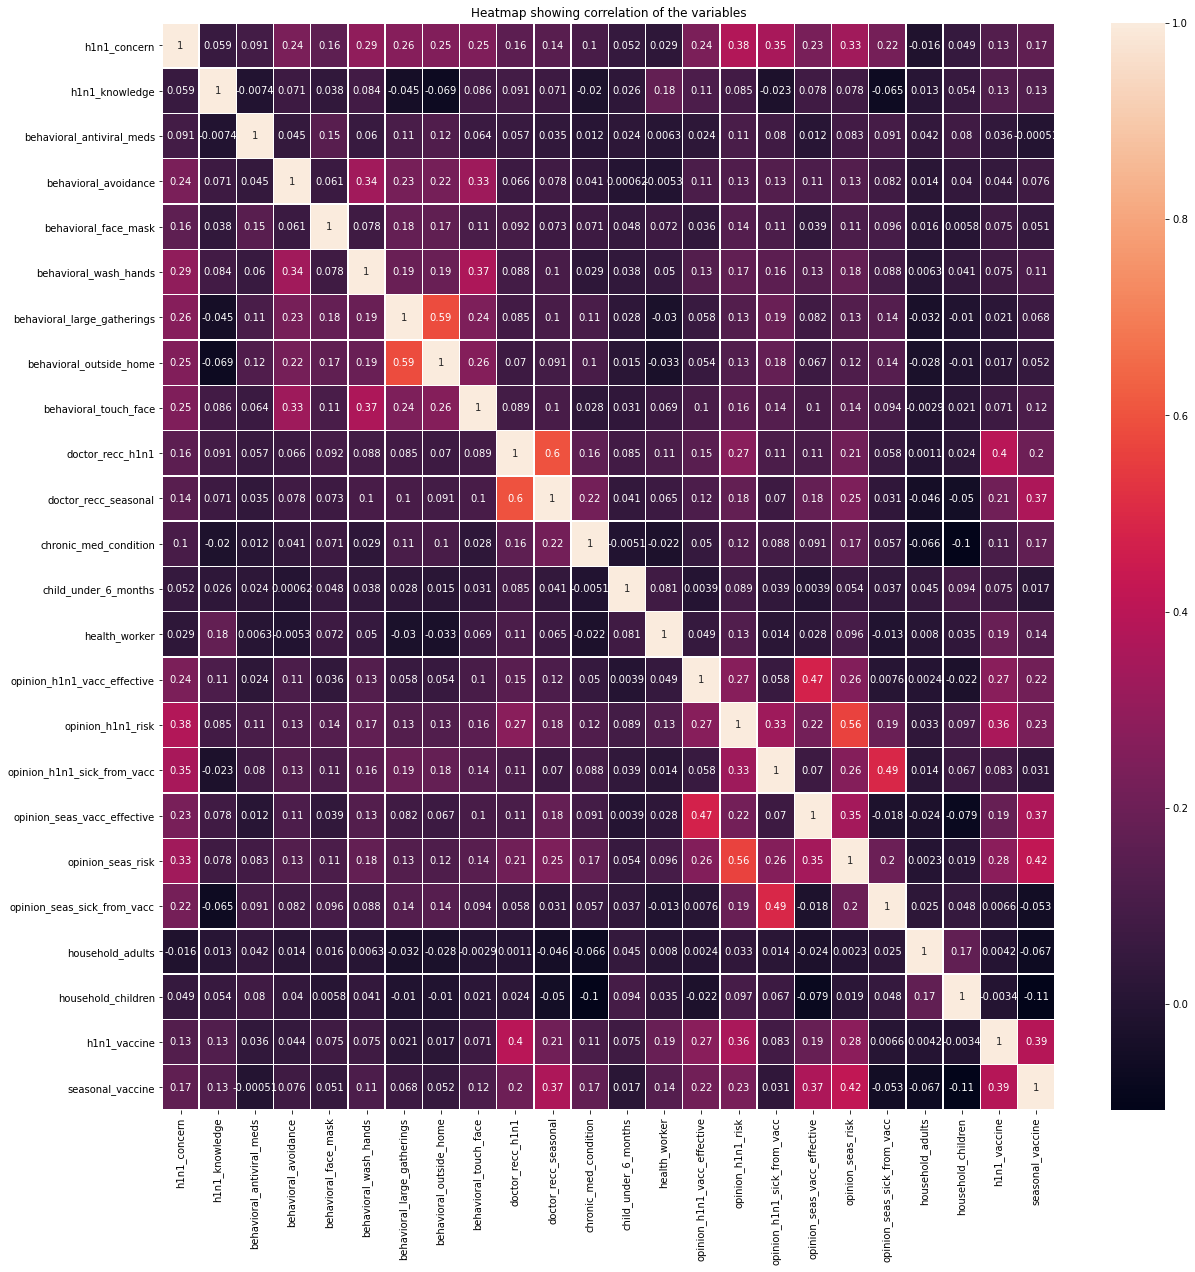

In [ ]:
corr =df.corr(method ='pearson') #checking for multicollinearity

plt.figure(figsize = (20,20))
sns.heatmap(corr,linewidth=0.5,annot=True)
plt.title('Heatmap showing correlation of the variables')
plt.show()


### ***Scaling***

In [ ]:
#Encoding the non numeric data types
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
non_numeric_columns = ordinal.fit_transform(X_train[non_numeric_columns])
pd.DataFrame(non_numeric_columns).head(3)

ValueError: Input contains NaN

In [ ]:
scaler = StandardScaler()
numeric_columns = scaler.fit_transform(X_train[numeric_columns])
pd.DataFrame(numeric_columns).head(3)

KeyError: "None of [Index([     (-1.0411464274703621, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, -1.4363304868621676, 1.4119299332485584, 1.5842758303218716, 3.339683406356311, -0.3580218054253433, -0.9484744059863167, 0.8966117975196755, -0.5247752918830763, -0.0898059592804175, 0.15256062127518086, -0.5767009846960385),\n                (-1.3777707071337304, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, 1.5842758303218716, 3.339683406356311, -0.3580218054253433, -0.9484744059863167, -1.880280131877806, 1.6408084340043532, -0.8385432174230687, 0.15256062127518086, -0.5767009846960385),\n                   (-0.8750352925441691, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, 1.5842758303218716, -0.2994295800903561, 2.7931259628501186, 1.0543247068012362, 0.8966117975196755, 0.9189471920418767, 2.156405815147536, 1.487466057433013, -0.5767009846960385),\n              (1.1935209059872292, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, -2.152686222145367, -0.745773041069623, -0.7150602188044464, -1.4363304868621676, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, 2.7931259628501186, 1.0543247068012362, 0.8966117975196755, -0.5247752918830763, 1.4076685570048848, 0.15256062127518086, 1.573660254181648),\n                (-1.4250275771633956, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, 1.3984836153687341, 0.696218599512301, 1.4119299332485584, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, 0.8966117975196755, 0.9189471920418767, -0.8385432174230687, -1.1823448148826512, -0.5767009846960385),\n                                                                                                                        (0.7165501958795949, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, -2.152686222145367, -0.745773041069623, -0.7150602188044464, -1.4363304868621676, nan, nan, nan, nan, -0.9484744059863167, nan, nan, nan, 0.15256062127518086, -0.5767009846960385),\n                (-0.5924003685037333, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, 1.3984836153687341, 0.696218599512301, 1.4119299332485584, 1.5842758303218716, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, 0.8966117975196755, 1.6408084340043532, -0.8385432174230687, 0.15256062127518086, -0.5767009846960385),\n          (1.6183148527470412, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, 1.5842758303218716, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, -0.029018845612818395, -0.5247752918830763, -0.0898059592804175, 0.15256062127518086, -0.5767009846960385),\n                            (1.1940387894944036, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, 1.3984836153687341, 0.696218599512301, nan, -0.6312032165489979, -0.2994295800903561, 2.7931259628501186, -0.9484744059863167, -0.029018845612818395, -0.5247752918830763, -0.8385432174230687, -1.1823448148826512, -0.5767009846960385),\n            (-1.6907018163438692, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, 0.8966117975196755, -0.5247752918830763, -0.0898059592804175, 0.15256062127518086, -0.5767009846960385),\n       ...\n       (0.45385378686537403, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, -2.152686222145367, -0.745773041069623, -0.7150602188044464, -1.4363304868621676, 1.4119299332485584, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, -0.029018845612818395, 0.9189471920418767, -0.8385432174230687, -1.1823448148826512, -0.5767009846960385),\n          (-0.9165954439949158, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, -1.4363304868621676, 1.4119299332485584, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, 0.8966117975196755, 0.9189471920418767, -0.8385432174230687, 0.15256062127518086, -0.5767009846960385),\n          (1.1359063658140758, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, -2.152686222145367, -0.745773041069623, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, -0.029018845612818395, -0.5247752918830763, -0.8385432174230687, -1.1823448148826512, -0.5767009846960385),\n           (-0.26678111336782134, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, 1.3984836153687341, 0.696218599512301, -0.7082504424983801, 1.5842758303218716, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, -0.029018845612818395, -0.5247752918830763, 1.4076685570048848, 0.15256062127518086, -0.5767009846960385),\n             (-0.17874091714817117, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, 1.340890518871201, 1.3984836153687341, 0.696218599512301, 1.4119299332485584, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, 0.8966117975196755, -0.5247752918830763, -0.8385432174230687, 0.15256062127518086, -0.5767009846960385),\n         (1.0656036797151491, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, -0.029018845612818395, -0.5247752918830763, -0.8385432174230687, -1.1823448148826512, -0.5767009846960385),\n                        (-1.0298824611893185, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, 0.696218599512301, nan, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, -0.029018845612818395, -0.5247752918830763, 1.4076685570048848, -1.1823448148826512, -0.5767009846960385),\n         (-1.616385533064341, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, -2.152686222145367, -0.745773041069623, -0.7150602188044464, 0.696218599512301, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, -0.9484744059863167, -0.029018845612818395, -0.5247752918830763, -0.0898059592804175, 0.15256062127518086, -0.5767009846960385),\n                   (0.3172620118481227, -0.22665644952608127, 0.6175811171284395, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, -0.7150602188044464, 0.696218599512301, 1.4119299332485584, 1.5842758303218716, -0.2994295800903561, 2.7931259628501186, 1.0543247068012362, -2.8059107750103, -1.2466365338455527, 1.4076685570048848, 0.15256062127518086, -0.5767009846960385),\n             (1.3347736325690502, -0.22665644952608127, -1.6192204914711277, -0.27394532395288984, 0.4645358853104935, -0.745773041069623, 1.3984836153687341, 0.696218599512301, -0.7082504424983801, -0.6312032165489979, -0.2994295800903561, -0.3580218054253433, 1.0543247068012362, 0.8966117975196755, -0.5247752918830763, -0.0898059592804175, -1.1823448148826512, -0.5767009846960385)],\n      dtype='object', length=18694)] are in the [columns]"

In [ ]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
warnings.filterwarnings("ignore")
     


In [ ]:
#loading the datasets
submission_format = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\submission_format.csv')
test_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\test_set_features.csv')
training_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_features.csv')
training_set_labels = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_labels.csv')

# first few rows of each dataset
print('SUBMISSION FORMAT DATASET')
print(submission_format.info())

print('\nTEST SET FEATURES DATASET')
print(test_set_features.info())

print('\nTRAINING SET FEATURES DATASET')
print(training_set_features.info())

print('\nTRAINING SET LABELS DATASET')
print(training_set_labels.info())


SUBMISSION FORMAT DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB
None

TEST SET FEATURES DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask       

## Multivariate Analysis

### Correlation Matrix

The major observations made from the correlation matrix can highlight the relationships between different variables. Here are some key takeaways:

Strong Positive Correlations:

Doctor Recommendations: There is a strong positive correlation between doctor_rec_h1n1 and doctor_rec_seasonal, indicating that if a doctor recommends one vaccine, they are likely to recommend the other as well.

Vaccine Effectiveness Opinions: A positive correlation exists between opinion_h1n1_vacc_effective and opinion_seas_vacc_effective, suggesting that individuals who believe in the effectiveness of one vaccine also tend to believe in the effectiveness of the other.

Behavioral Factors:

Health Behavior Correlations: Variables like behavioral_touch_face and behavioral_antiviral_meds might show correlations with vaccine uptake, indicating how health behaviors impact vaccination decisions.

Sociodemographic Correlations:

Income and Vaccine Uptake: There may be correlations between income_poverty and vaccine uptake (h1n1_vaccine and seasonal_vaccine), showing how socioeconomic status affects health choices.

Education Level: Correlations between educational attainment (education) and vaccine opinions or uptake can provide insights into how education influences health behaviors.

Geographic and Employment Status:

Regional Differences: Correlations involving geographic variables (loc_) can highlight regional disparities in vaccine uptake.

Employment Status: The correlation between employment_status and vaccine uptake can reveal how employment influences access to and opinions about vaccines.

People that believe in the effectiveness of the seasonal flu vaccine are more likely to take it. People that are also more cautious about the risk of catching the flu without the vaccine are also more likely to take it.

Observation:

The correlations observed against the H1N1 Vaccine are within moderate levels, suggesting potential compatibility for regression modeling without encountering multicollinearity issues. However, to ensure the absence of problematic multicollinearity, we will assess the Variance Inflation Factor (VIF) for each predictor variable after encoding all categorical variables. Elevated VIF values of greater than 5, could signify potential concerns related to multicollinearity.

In [ ]:
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
#checking for outliers using the function 
detect_outliers(df).sum()

behavioral_antiviral_meds      1301.0
behavioral_avoidance              0.0
behavioral_face_mask           1841.0
behavioral_wash_hands             0.0
behavioral_large_gatherings       0.0
behavioral_outside_home           0.0
behavioral_touch_face             0.0
doctor_recc_seasonal              0.0
chronic_med_condition             0.0
child_under_6_months           2138.0
health_worker                  2899.0
health_insurance                  0.0
opinion_seas_vacc_effective    5633.0
opinion_seas_risk                 0.0
opinion_seas_sick_from_vacc       0.0
age_group                         0.0
education                         0.0
race                              0.0
sex                               0.0
income_poverty                    0.0
marital_status                    0.0
rent_or_own                       0.0
employment_status                 0.0
hhs_geo_region                    0.0
census_msa                        0.0
household_adults               3375.0
household_ch

In [ ]:
# creating a new dataframe consisiting of selected features and target variable
df = df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'doctor_recc_h1n1', 
        'chronic_med_condition', 'child_under_6_months', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'h1n1_vaccine']]
df

KeyError: "['opinion_h1n1_vacc_effective', 'opinion_h1n1_sick_from_vacc', 'doctor_recc_h1n1', 'h1n1_vaccine', 'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_risk'] not in index"

# Modelling

Having Explored our data, we now start in building our models and fine tuning the models so as to get an overally better performing model than the baseline model and that which helps us to achieve better responses to our objectives. The models we used are:

Logistic Regression
Decision Trees classifier
Random Forest Classifier
K-Nearest Neighbor
These models also have been fine-tuned to have better results

We decided to split the data that we have into training and training sets.

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns='h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We used the StandardScaler to standardise the features that will be used in creating the models and we then transform the training and test input data

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Transform the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

Baseline Model : Logistic regression
This model is built with the default values for the parameters are used

In [ ]:
#Buiding a baseline model logistic regression model 

# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7649392511777833
Test Acurracy:  0.7714431152965131


We then evaluate the model's training performance by comparing the training and testing results
The code below is a function for generating a summary of the evaluation metrics used to evaluate the data used in creating the model.

In [ ]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

{'roc_auc_train': 0.7649392511777833,
 'roc_auc_test': 0.7498497854077253,
 'accuracy_train': 0.7649392511777833,
 'accuracy_test': 0.7714431152965131,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19fcc5a1dc0>}

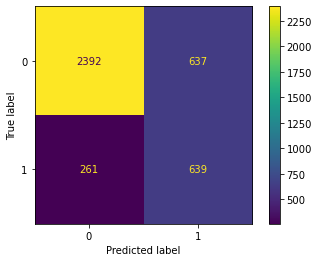

In [ ]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(logreg, X_train_scaled,y_train, X_test_scaled, y_test)

Explanation
The results for the evaluation metrics gives the model a train and test roc_auc score of 0.74 and 0.77 respectively. A higher roc_auc gives a better model since it can clearly distinguish between the positive and negative classes.
The train set accuracy is 0.74 which is lower than the test accuracy of 0.78. This means that the test model performed overally better than the training model


## Generate a classification Report

In [ ]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report
# calling the function to get classifification report values
logreg_report = generate_classification_report(y_test, y_test_pred)
logreg_report

,precision,recall,f1-score,support
0,0.901621,0.789700,0.841957,3029.000000
1,0.500784,0.710000,0.587316,900.000000
accuracy,0.771443,0.771443,0.771443,0.771443
macro avg,0.701202,0.749850,0.714637,3929.000000
weighted avg,0.809803,0.771443,0.783628,3929.000000


Classification report
From the classification report our base model has a precision of 0.91, recall of 0.80 and an F1-score of 0.85 in predicting the negatives in the target variable.
It also shows that the positives are predicted with a precision of 0.51, recall of 0.75 and an F1-score of 0.61.
The model has an average accuracy of 78.52% which is quite a good level of accuracy of the baseline model.

Logistic Regression with cross-validation
We then fine-tune the logistic regrssion model by adding a cross-validation feature to it

In [ ]:
# Create an instance of Logistic Regression with cross-validation
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_scaled, y_train)

# Predict on the resampled training and testing data
y_train_pred = logreg_final.predict(X_train_scaled)
y_test_pred = logreg_final.predict(X_test_scaled)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7649392511777833
Test Acurracy:  0.7714431152965131


### Decision Tree Classifier

In [ ]:
# Create an instance of DecisionTreeClassifier with regularization parameters
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

# Fit the model on the training data
dt_clf.fit(X_train_scaled, y_train)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_scaled)
y_test_pred_2 = dt_clf.predict(X_test_scaled)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred_2)
test_accuracy = accuracy_score(y_test, y_test_pred_2)
print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7790313249028845
Test Acurracy:  0.776024433698142


{'roc_auc_train': 0.7790313249028845,
 'roc_auc_test': 0.7391541029309271,
 'accuracy_train': 0.7790313249028845,
 'accuracy_test': 0.776024433698142,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19fd984d910>}

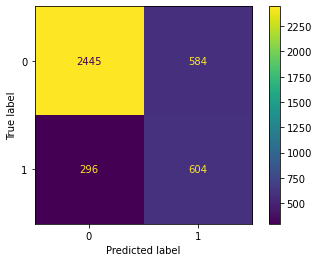

In [ ]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test)

Explanation
The results for the evaluation metrics gives the model a train and test roc_auc score of 0.77 and 0.75 respectively. A higher roc_auc int the training shows the model was able to clearly separate the two target classes more accurately than the test set.
The accuracy is 0.77 wof both the train and test set accuracy is 0.77. There is no big difference in their levels af accuracy. This clearly shows that this model has performed better than the base model

In [ ]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.892010,0.807197,0.847487,3029.000000
1,0.508418,0.671111,0.578544,900.000000
accuracy,0.776024,0.776024,0.776024,0.776024
macro avg,0.700214,0.739154,0.713016,3929.000000
weighted avg,0.804142,0.776024,0.785881,3929.000000


Report
From the classification report our model has a precision of 0.90, recall of 0.78 and an F1-score of 0.84 in predicting the negatives in the target variable.
It also shows that the positives are predicted with a precision of 0.50, recall of 0.72 and an F1-score of 0.58.
The model has an average accuracy of 77% which is quite a good level of accuracy of the Decision Tree model.

## : Random Forest Classifier

In [ ]:
# Create a random forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_scaled)
y_test_pred_3 = rf_classifier.predict(X_test_scaled)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_3)
test_accuracy = accuracy_score(y_test, y_test_pred_3)
print('Train Acurracy: ', train_accuracy)
print('Test Acurracy: ', test_accuracy)

Train Acurracy:  0.7859327217125383
Test Acurracy:  0.7821328582336472


{'roc_auc_train': 0.7859327217125383,
 'roc_auc_test': 0.7513159825391584,
 'accuracy_train': 0.7859327217125383,
 'accuracy_test': 0.7821328582336472,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19fd3e98d30>}

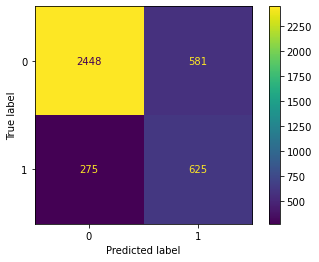

In [ ]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

Explanation
The results for the evaluation metrics gives the model a train and test roc_auc score of 0.78 and 0.76 respectively. A higher roc_auc int the training shows the model was able to clearly separate the two target classes more accurately than the test set.
The accuracy of the train set is 78% and test set accuracy is 80% . There is a big improvement in accuracy as compared to the two previous model.

In [ ]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.899008,0.808188,0.851182,3029.000000
1,0.518242,0.694444,0.593542,900.000000
accuracy,0.782133,0.782133,0.782133,0.782133
macro avg,0.708625,0.751316,0.722362,3929.000000
weighted avg,0.811788,0.782133,0.792166,3929.000000


Report
From the classification report our model has a precision of 0.90, recall of 0.83 and an F1-score of 0.86 in predicting the negatives in the target variable.
It also shows that the positives are predicted with a precision of 0.54, recall of 0.70 and an F1-score of 0.61.
The model has an average accuracy of 80% which is the best model accuracy we have attained .

### KNN

In [ ]:
# KNN
# Create and train the model
knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_train = knn_model.predict(X_train_scaled)
y_pred = knn_model.predict(X_test_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 0.7709314819406563
Test Accuracy: 0.7719521506744719


{'roc_auc_train': 0.7709314819406562,
 'roc_auc_test': 0.7435416895931918,
 'accuracy_train': 0.7709314819406563,
 'accuracy_test': 0.7719521506744719,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x19fd7c5a760>}

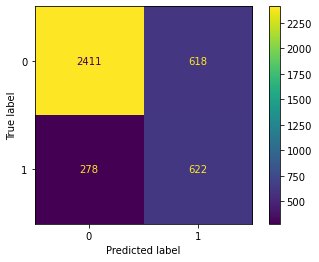

In [ ]:
#checking for KNN metrics using the predefiend function 
evaluate_model_metrics(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
generate_classification_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.896616,0.795972,0.843302,3029.000000
1,0.501613,0.691111,0.581308,900.000000
accuracy,0.771952,0.771952,0.771952,0.771952
macro avg,0.699114,0.743542,0.712305,3929.000000
weighted avg,0.806134,0.771952,0.783288,3929.000000


Report
From the classification report our model has a precision of 0.91, recall of 0.76 and an F1-score of 0.82 in predicting the negatives in the target variable.

It also shows that the positives are predicted with a precision of 0.47, recall of 0.74 and an F1-score of 0.53.

The model has an average accuracy of 76% which is quite a good level of accuracy of the KNN model, though it is quit lower than the previous Random Forest Classifier model.

Hyperparameter Tuning on the best Model
We perform hyperparameter tuning on the Random Forest Classifier in order to get the optimal accuracy that can be achieved by the model. We need to tune the parameters in order to get the appropriate number of the features that can be used to give us the best accuracy.

Interpretation
The train and test set accuracy have had no change even after hyperparameter tuning. Our Random Forest Model still remains to be our best model so far.

In [ ]:
#drawing ROC curve for the above five models 

# Compute ROC curves and AUC scores for each model
models = [logreg, logreg_final, dt_clf, rf_classifier, knn_model]
labels = ['Logistic Regression','Tuned Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']

plt.figure(figsize=(10, 8))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Interpretation
The ROC-AUC curves gives us a visual represenatation of the True positives rate against the false positives rate. The model curve with the highest area under the curve is taken to be the best model.

The KNN model has the highest ROC-AUC of 0.67, followed by the Random Forest Model. Though the KNN has a better ROC-AUC, it still has a wanting accuracy.